The dataset is from the Many Labs Replication Project in which 13 effects were replicated across 36 samples and over 6,000 participants. Data from the replications are included, along with demographic variables about the participants and contextual information about the environment in which the replication was conducted. Data were collected in-lab and online through a standardized procedure administered via an online link. The dataset is stored on the Open Science Framework website. These data could be used to further investigate the results of the included 13 effects or to study replication and generalizability more broadly

The sample is comprised of 6,344 participants recruited from 36 different sources including university subject
pools, Amazon Mechanical Turk, Project Implicit, and other sources. The aggregate sample has a mean age of
25.98. Participant ethnicity is: 65.1% White, 6.7% Black or African American, 6.5% East Asian, 4.5% South Asian,
17.2% Other or Unknown. Participant gender is 63.6% female, 29.9% male, 6.5% no response. 

The Original Many Labs Project: The original Many Labs project attempted to replicate 28 psychological studies, across 60 different labs, trying to determine to what extent the originally studied effect was reproducible. Questions given to subjects touched on a diverse array of topics from nationalism, to the perceptions of numbers, to feelings about art and mathematics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import pyreadstat
import statistics
import random
from copy import deepcopy
import itertools
from sklearn import preprocessing

In [2]:
data = pd.read_csv('ML1/Tab.delimited.Cleaned.dataset.WITH.variable.labels.csv', sep = '\t', encoding = "ISO-8859-1")
data.head()

/home/vedantc6/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,55,59,61,65,68,69,70,83,90,91,92,93,120,121,122,123,126,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,session_id,session_date,last_update_date,session_last_update_date,referrer,creation_date,session_creation_date,expcomments,numparticipants_actual,numparticipants,...,diseaseforder,quoteorder,flagprimorder,sunkcostorder,anchorinorder,allowedforder,gamblerforder,moneypriorder,imaginedorder,iatorder
0,2400853,8/28/2013,8/28/13 12:15,8/28/13 12:15,abington,8/28/2013,8/28/2013,.,,5,...,4,3,7,2,8,6,10,1,11,12
1,2400856,8/28/2013,8/28/13 12:13,8/28/13 12:13,abington,8/28/2013,8/28/2013,.,,5,...,7,5,2,6,11,9,1,4,8,12
2,2400860,8/28/2013,8/28/13 12:15,8/28/13 12:15,abington,8/28/2013,8/28/2013,.,,5,...,2,8,9,3,5,10,6,4,11,12
3,2400868,8/28/2013,8/28/13 12:12,8/28/13 12:12,abington,8/28/2013,8/28/2013,.,,5,...,7,8,10,6,9,4,1,11,2,12
4,2400872,8/28/2013,8/28/13 12:11,8/28/13 12:11,abington,8/28/2013,8/28/2013,.,,.,...,10,3,11,6,9,5,4,1,2,12


## Identify Column Classes

In [3]:
mixed_columns = ['flagsupplement1', 'flagsupplement2', 'flagsupplement3', 'iatexplicitart1', 'iatexplicitart2',
                'iatexplicitart3', 'iatexplicitart4', 'iatexplicitart5', 'iatexplicitart6', 'iatexplicitmath1',
                'iatexplicitmath2', 'iatexplicitmath3', 'iatexplicitmath4', 'iatexplicitmath5', 'iatexplicitmath6',
                'sysjust1', 'sysjust2', 'sysjust3', 'sysjust4', 'sysjust5', 'sysjust6', 'sysjust7', 'sysjust8',
                'mturk.non.US', 'exprace']

all_NAN_columns = ['task_status', 'task_sequence', 'beginlocaltime']

numeric_columns = ['anchoring3ameter', 'anchoring3bmeter', 'anchoring1akm', 'anchoring1bkm', 'priorexposure8',
                    'mturk.duplicate', 'mturk.exclude.null', 'mturk.keep', 'mturk.exclude', 'gamblerfallacya_sd',
                    'gamblerfallacyb_sd', 'totexpmissed', 'numparticipants_actual', 'session_id', 'IATfilter',
                    'priorexposure3', 'priorexposure4', 'priorexposure5', 'priorexposure6', 'priorexposure7', 
                    'priorexposure9', 'priorexposure10', 'priorexposure11', 'priorexposure12', 'priorexposure13',
                    'numparticipants', 'age', 'anchoring1a', 'priorexposure1', 'priorexposure2', 'mturk.total.mini.exps',
                    'anchoring1b', 'anchoring2a', 'anchoring2b', 'anchoring3a', 'anchoring3b', 'anchoring4a',
                    'anchoring4b', 'artwarm', 'd_donotuse', 'ethnicity', 'flagdv1', 'flagdv2', 'flagdv3',
                    'flagdv4', 'flagdv5', 'flagdv6', 'flagdv7', 'flagdv8', 'gamblerfallacya', 'gamblerfallacyb',
                    'imaginedexplicit1', 'imaginedexplicit2', 'imaginedexplicit3', 'imaginedexplicit4',
                    'major', 'mathwarm', 'moneyagea', 'moneyageb', 'moneygendera', 'moneygenderb', 'omdimc3rt',
                    'omdimc3trt', 'quotea', 'quoteb', 'sunkcosta', 'sunkcostb', 'user_id', 'previous_session_id',
                    'order', 'meanlatency', 'meanerror', 'block2_meanerror', 'block3_meanerror', 'block5_meanerror',
                    'block6_meanerror', 'lat11', 'lat12', 'lat21', 'lat22', 'sd1', 'sd2', 'd_art1', 'd_art2', 'd_art',
                    'sunkDV', 'anchoring1', 'anchoring2', 'anchoring3', 'anchoring4', 'Ranchori', 'RAN001',
                    'RAN002', 'RAN003', 'Ranch1', 'Ranch2', 'Ranch3', 'Ranch4', 'gambfalDV', 'scalesreca', 'scalesrecb',
                    'reciprocityother', 'quotearec', 'quotebrec', 'quote', 'totalflagestimations', 'totalnoflagtimeestimations',
                    'flagdv', 'Sysjust', 'moneyfilter', 'Imagineddv', 'IATexpart', 'IATexpmath', 'IATexp.overall',
                    'IATEXPfilter', 'scalesorder', 'reciprocorder', 'diseaseforder', 'quoteorder', 'flagprimorder',
                    'sunkcostorder', 'anchorinorder', 'allowedforder', 'gamblerforder', 'moneypriorder', 'imaginedorder',
                    'iatorder']

date_columns = [col for col in data.columns if '_date' in col]

non_string_columns = mixed_columns + all_NAN_columns + numeric_columns + date_columns
string_columns = sorted([col for col in data.columns if col not in non_string_columns])

## Convert ['', ' ' and .] to NaN

In [4]:
data = data.replace({'': np.nan, ' ': np.nan, '.': np.nan})

## Convert Columns to Respective Data Types
### 1. Numeric Columns

In [5]:
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col])

### 2. Date Columns

In [6]:
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

### 3. String Columns

In [7]:
for col in string_columns:
    data[col] = data[col].astype(str)

### 4. Mixed Columns
Reading the paper https://osf.io/ebmf8/ to clean the mixed columns

#### How to encode exprace? 
exprace ['6' '10' 'brazilwhite' 'brazilblack' 'brazilbrown' nan 'chinese' 'malay'
 '8' '7' '5' '9' '2' '3' 'dutch' '1']

In [8]:
data["flagsupplement1"] = data["flagsupplement1"].apply(lambda x:
                                                    '11' if x == 'Very much' else 
                                                    ('1' if x == 'Not at all' else x))
data["flagsupplement2"] = data["flagsupplement2"].apply(lambda x:
                                                    '1' if x == 'Democrat' else 
                                                    ('7' if x == 'Republican' else x))
data["flagsupplement3"] = data["flagsupplement3"].apply(lambda x:
                                                    '1' if x == 'Liberal' else 
                                                    ('7' if x == 'Conservative' else x))

data["iatexplicitart1"] = data["iatexplicitart1"].apply(lambda x:
                                                    '1' if x == 'Very bad' else 
                                                    ('2' if x == 'Moderately bad' else x))
data["iatexplicitart2"] = data["iatexplicitart2"].apply(lambda x:
                                                    '1' if x == 'Very Sad' else 
                                                    ('2' if x == 'Moderately Sad' else x))
data["iatexplicitart3"] = data["iatexplicitart3"].apply(lambda x:
                                                    '1' if x == 'Very Ugly' else 
                                                    ('2' if x == 'Moderately Ugly' else x))
data["iatexplicitart4"] = data["iatexplicitart4"].apply(lambda x:
                                                    '1' if x == 'Very Disgusting' else 
                                                    ('2' if x == 'Moderately Disgusting' else x))
data["iatexplicitart5"] = data["iatexplicitart5"].apply(lambda x:
                                                    '1' if x == 'Very Avoid' else 
                                                    ('2' if x == 'Moderately Avoid' else x))
data["iatexplicitart6"] = data["iatexplicitart6"].apply(lambda x:
                                                    '1' if x == 'Very Afraid' else 
                                                    ('2' if x == 'Moderately Afraid' else x))

data["iatexplicitmath1"] = data["iatexplicitmath1"].apply(lambda x:
                                                    '1' if x == 'Very bad' else 
                                                    ('2' if x == 'Moderately bad' else
                                                    ('3' if x == 'Slightly bad' else x)))
data["iatexplicitmath2"] = data["iatexplicitmath2"].apply(lambda x:
                                                    '1' if x == 'Very Sad' else 
                                                    ('2' if x == 'Moderately Sad' else
                                                    ('3' if x == 'Slightly Sad' else x)))
data["iatexplicitmath3"] = data["iatexplicitmath3"].apply(lambda x:
                                                    '1' if x == 'Very Ugly' else 
                                                    ('2' if x == 'Moderately Ugly' else
                                                    ('3' if x == 'Slightly Ugly' else x)))
data["iatexplicitmath4"] = data["iatexplicitmath4"].apply(lambda x:
                                                    '1' if x == 'Very Disgusting' else 
                                                    ('2' if x == 'Moderately Disgusting' else
                                                    ('3' if x == 'Slightly Disgusting' else x)))
data["iatexplicitmath5"] = data["iatexplicitmath5"].apply(lambda x:
                                                    '1' if x == 'Very Avoid' else 
                                                    ('2' if x == 'Moderately Avoid' else
                                                    ('3' if x == 'Slightly Avoid' else x)))
data["iatexplicitmath6"] = data["iatexplicitmath6"].apply(lambda x:
                                                    '1' if x == 'Very Afraid' else 
                                                    ('2' if x == 'Moderately Afraid' else
                                                    ('3' if x == 'Slightly Afraid' else x)))

for col in mixed_columns:
    if "sysjust" in col:
        data[col] = data[col].apply(lambda x:
                                    '1' if x == 'Strongly disagree' else 
                                    ('7' if x == 'Strongly agree' else x))

data["mturk.non.US"] = data["mturk.non.US"].apply(lambda x: '1' if x == 'non-US IP address' else x)
data["exprace"] = data["exprace"].apply(lambda x: '11' if x == 'brazilwhite' else 
                                        ('12' if x == 'brazilblack' else
                                        ('13' if x == 'brazilbrown' else
                                        ('14' if x == 'chinese' else
                                        ('15' if x == 'malay' else
                                        ('16' if x == 'dutch' else x))))))

In [9]:
for col in mixed_columns:
    data[col] = data[col].astype(str)

In [10]:
all_columns = [numeric_columns, string_columns, mixed_columns, date_columns, all_NAN_columns]

There are 182 out of 382 columns which have at least 1 missing value. The above table is sorted in ascending order. Our initial thought process is to start from the columns which have low count of missing values, because those will be relatively easy to impute.

According to the Codebook, 
- session_creation_date is redundant as we have create_date
- session_last_update_date is redundant as we have last_update_date 

As of now, we believe we can remove columns which have all missing values, because we have no knowledge of how that column is, and what should be filled there (no training examples). This means the following are removed,
- task_sequence
- task_status
- beginlocaltime

"expcomments" has nan, still not coming in missing values. When doing a check with == np.nan, showing False ---- added check

In [11]:
data.drop(date_columns, inplace=True, axis=1)
data.columns

Index(['session_id', 'referrer', 'expcomments', 'numparticipants_actual',
       'numparticipants', 'expgender', 'exprace', 'exprunafter',
       'exprunafter2', 'compensation',
       ...
       'diseaseforder', 'quoteorder', 'flagprimorder', 'sunkcostorder',
       'anchorinorder', 'allowedforder', 'gamblerforder', 'moneypriorder',
       'imaginedorder', 'iatorder'],
      dtype='object', length=331)

In [12]:
class VAE():
    # Sigmoid
    def sigmoid(self, x, derivative=False):
        sig = 1/(1+np.exp(-x))
        return sig*(1-sig) if derivative else sig
    
    # Relu
    def relu(self, x, derivative=False):
        return 1.0*(x > 0) if derivative else x*(x > 0)
    
    # Leaky Relu
    def leaky_relu(self, x, alpha=0.01, derivative=False):
        if derivative:
            return 1 if x > 0 else alpha
        return x if x > 0 else alpha*x
    
    

## ML Models
### 1. Mean Mode Imputation

In [13]:
class MeanMode():
    def __init__(self, numeric_columns):
        self.numeric_columns = numeric_columns
        
    def predict(self, feature_name, train):
        if feature_name in self.numeric_columns:
            return np.mean(train)
        else:
            return str(Counter(train).most_common(1)[0][0])
    
    def categorical_loss(self, y_true, y_pred):
        counts = 0
        for i in range(len(y_true)):
            if y_true[i] != y_pred[i]:
                counts += 1
        return counts/len(y_true)
    
    def get_mse(self, y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        if y_pred.dtype != "float64":
            return self.categorical_loss(y_true, y_pred)
        return np.mean((y_true - y_pred)**2)

### 2. Linear Regression

In [227]:
class LinearRegression:
    def __init__(self, weights=None, bias=None):
        self.w = weights
        self.b = bias
    
    def predict(self, X):
        return (np.dot(X, self.w)) + self.b
    
    def fit(self, X, y, alpha=0.001, iterations=100):
#         Step 1: Initialize the parameters
        n_samples, n_features = X.shape
        self.w = np.zeros(shape=(n_features, 1))
        self.b = 0
        J = []
        y = y.reshape(-1, 1)
        for i in range(iterations):
#             Step 2: Calculate y_predicted
            y_hat = self.predict(X)
#             Step 3: Compute the cost
            cost = (1/n_samples)*np.sum((y_hat-y)**2)
            J.append(cost)
        
#             if i % (iterations-1) == 0:
#                 print("Cost at iteration {} is: {}".format(i, cost))
                
#             Step 4: Compute partial derivatives
            dJ_dw = (2/n_samples)*np.dot(X.T, (y_hat-y))
            dJ_db = (2/n_samples)*np.sum((y_hat-y))
#             Step 5: Update the parameters
            self.w = self.w - alpha*dJ_dw
            self.b = self.b - alpha*dJ_db
    
    def get_mse(self, y_true, y_pred):
        return np.sum((y_true - y_pred)**2)/y_true.shape[0]

### 3. Ridge Regression

In [228]:
class RidgeRegression():
    
    def __init__(self, 
                 bias = None, 
                 weights = None, 
                 lambda_param = 10, 
                 fit_intercept = True):
        self.bias = bias
        self.weights = weights
        self.fit_intercept = fit_intercept
        self.lambda_param = lambda_param
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = np.column_stack((np.ones(len(X)), X))
        else:
            X = np.column_stack((np.zeros(len(X)), X))
            
        self.all_weights = np.linalg.inv(np.dot(X.T, X) + \
                            self.lambda_param * np.identity(X.shape[1])).dot(X.T).dot(y)
        self.weights = self.all_weights[1:]
        self.bias = self.all_weights[0]
    
    def predict(self, X):
        self.weights = self.weights.reshape(1, -1)
        predictions = self.bias + np.dot(self.weights, X.T)
        return predictions[0]
    
    def get_mse(self, y_true, y_pred):
        return np.sum((y_true - y_pred)**2)/y_true.shape[0]

### 4. Lasso Regression

In [ ]:
class LassoRegression():
    def __init__(self, 
                 bias = None, 
                 weights = None, 
                 lambda_param = 10, 
                 max_iters = 100, 
                 fit_intercept = True):
        self.bias = 0    
        self.lambda_param = lambda_param
        self.max_iters = max_iters
        self.fit_intercept = fit_intercept
    
    def _soft_threshold(self, x, lambda_):
        if x > 0.0 and lambda_ < abs(x):
            return x - lambda_
        elif x < 0.0 and lambda_ < abs(x):
            return x + lambda_
        else:
            return 0.0
    
    def fit(self, X, y):
        
        if self.fit_intercept:
            X = np.column_stack((np.ones(len(X)), X))
        else:
            X = np.column_stack((np.zeros(len(X)), X))
            
        row_length, column_length = X.shape
        
        # Define the weights
        self.weights = np.zeros((1, column_length))[0]
        if self.fit_intercept:
            self.weights[0] = np.sum(y - \
                                np.dot(X[:, 1:], self.weights[1:]))/(X.shape[0])
        
        #Looping until max number of iterations
        for iteration in range(self.max_iters):
            start = 1 if self.fit_intercept else 0
            
            #Looping through each coordinate
            for j in range(start, column_length):
                    
                tmp_weights = self.weights.copy()
                tmp_weights[j] = 0.0
                r_j = y - np.dot(X, tmp_weights)
                arg1 = np.dot(X[:, j], r_j)
                arg2 = self.lambda_param * X.shape[0]

                self.weights[j] = self._soft_threshold(arg1, arg2)/(X[:, j]**2).sum()

                if self.fit_intercept:
                    self.weights[0] = np.sum(y - \
                                        np.dot(X[:, 1:], self.weights[1:]))/(X.shape[0])
        
        self.bias = self.weights[0]
        self.weights = self.weights[1:]
    
    def predict(self, X):
        self.weights = self.weights.reshape(1, -1)
        predictions = self.bias + np.dot(self.weights, X.T)
        return predictions[0]
    
    def get_mse(self, y_true, y_pred):
        return np.sum((y_true - y_pred)**2)/y_true.shape[0]

In [229]:
mean_mode_model = MeanMode(numeric_columns=all_columns[0])
ridge = RidgeRegression()
lin_reg = LinearRegression()

models = [mean_mode_model, lin_reg, ridge]

In [248]:
# all_columns = [numeric_columns, string_columns, mixed_columns, date_columns, all_NAN_columns]
class Pipeline():
    def __init__(self, data, models, all_columns):
        self.data = data
        # Copy of original data
        self.data_orig = data
        
        self.all_columns = all_columns
        # Categorical columns 
        self.cat_cols = self.all_columns[1]
        self.cat_cols.extend(self.all_columns[2])
        
        self.data = self.data.drop(columns=self.all_columns[4])
        self.data = self.data.drop(columns=['expcomments'])
    
        # self.data = self.data.replace({'': np.nan, ' ': np.nan, '.': np.nan})
        # self.data["expcomments"] = self.data["expcomments"].replace({'nan': np.nan})
        
        # Convert categorical columns to encodings
        for col in self.cat_cols:
            if col in self.data.columns:
                self.data[col] = self.data[col].astype("category").cat.codes
        
        # Model objects
        self.mean_mode = models[0]
        self.lin_reg = models[1]
        self.ridge = models[2]
    
    def count_missing(self, data):
        return data.isnull().sum()
    
    def missing_value_perc(self):
        missing_value_data = (self.data.isnull().sum()*100/len(self.data)).reset_index()
        missing_value_data.columns = ["feature", "perc"]
        full_value_data = missing_value_data[missing_value_data["perc"] == 0]
        missing_value_data = missing_value_data[missing_value_data["perc"] > 0]
        missing_value_data = missing_value_data.sort_values(by=['perc'])
        missing_value_data = missing_value_data.set_index("feature")
#         for ind in missing_value_data.index:
#             if "_date" in ind:
#                 missing_value_data = missing_value_data.drop(ind, axis=0)
        missing_value_data = missing_value_data.reset_index()
        return missing_value_data, full_value_data

    def create_full_data(self, data):
        data_without_nan = data.drop(pd.isnull(data).any(1).nonzero()[0])
        return data_without_nan

    def min_max_scalar(self, data):
        d = {}
        for col in data.columns:
            if col not in d:
                d[col] = [min(data[col]), max(data[col])]

        df_min_max = pd.DataFrame.from_dict(d)
        return df_min_max
    
    def scale_transform(self, data):
        for col in data.columns:
            min_val = self.df_min_max[col][0]
            max_val = self.df_min_max[col][1]
            if max_val != min_val:
                denom = (max_val - min_val)
            else:
                denom = 0.0001
            data[col] = (data[col] - min_val)/ denom
        return data
    
    def k_fold(self, max_index, n_folds=10):
        n = max_index
        idxs = np.arange(n)
        fold_sizes = (n // n_folds) * np.ones(n_folds, dtype=np.int)
        fold_sizes[:n % n_folds] += 1
        current = 0
        splits = []
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            val = idxs[start:stop]
            splits.append(list(val))
            current = stop
        
        return splits
    
    def cross_validation(self, train_data, X_test, y_test, model, feature_name):
        preds = []
        losses = []
        
        max_index = len(train_data[feature_name])
        k_fold_splits = self.k_fold(max_index, n_folds=10)
        
        if model == "mean_mode":
            for i in range(len(k_fold_splits)):
                k_copy = k_fold_splits.copy()
                del k_copy[i]
                val = k_fold_splits[i]
                train_i = list(itertools.chain.from_iterable(k_copy))
                val_data = train_data.iloc[val,:]
                new_train_data = train_data.iloc[train_i,:]
                                
                X_train = new_train_data.drop(feature_name, axis=1)
                
                self.df_min_max = self.min_max_scalar(X_train)
                
                X_train = self.scale_transform(X_train)
                y_train = new_train_data[feature_name]
                
                X_val = val_data.drop(feature_name, axis=1)
                X_val = self.scale_transform(X_val)
                y_val = val_data[feature_name]
                
                y_pred = [np.nan]*len(y_val)
                y_pred = pd.DataFrame(y_pred)
                value = self.mean_mode.predict(feature_name, y_train)
                y_pred = y_pred.fillna(value)
                loss = self.mean_mode.get_mse(y_val, y_pred)
                preds.append(value)
                losses.append(loss)
        
            predicted_mean = statistics.mean(preds) if type(preds[0]) is float else str(Counter(preds).most_common(1)[0][0])
#             print("Mean prediction: ", predicted_mean)
            y_test = y_test.fillna(predicted_mean)
        
        else:
            # Only can be used for numeric columns
            for i in range(len(k_fold_splits)):
                k_copy = k_fold_splits.copy()
                del k_copy[i]
                val = k_fold_splits[i]
                train_i = list(itertools.chain.from_iterable(k_copy))
                val_data = train_data.iloc[val,:]
                new_train_data = train_data.iloc[train_i,:]

                X_train = new_train_data.drop(feature_name, axis=1)
#                     X_train = new_train_data.drop(X_train.columns[-1], axis=1)

                self.df_min_max = self.min_max_scalar(X_train)

                X_train = self.scale_transform(X_train)
                y_train = new_train_data[feature_name]

                X_val = val_data.drop(feature_name, axis=1)
#                     X_val = val_data.drop(X_val.columns[-1], axis=1)

                X_val = self.scale_transform(X_val)
                y_val = val_data[feature_name]

                X_train = np.asarray(X_train)
                y_train = np.asarray(y_train)
                X_val = np.asarray(X_val)
                y_val = np.asarray(y_val)

                X_test = self.scale_transform(X_test)
                if model == "lin_reg":
                    self.lin_reg.fit(X_train, y_train, iterations=50)
                    y_pred = self.lin_reg.predict(X_val)
                    y_test = self.lin_reg.predict(X_test)
                    loss = self.lin_reg.get_mse(y_val, y_pred)

                elif model == "ridge":                    
                    self.ridge.fit(X_train, y_train)
                    y_pred = self.ridge.predict(X_val)
                    y_test = self.ridge.predict(X_test)
                    loss = self.ridge.get_mse(y_val, y_pred)

                losses.append(loss)
                preds.append(y_test)
        
        y_test_mean = np.mean(preds, axis=0)
        scaled_loss = np.mean(losses)
        scaled_loss = 100*abs((scaled_loss - min(losses))/(max(losses) - min(losses)))
        print("Model: {}, Loss: {}".format(model, scaled_loss))
        if model == "mean_mode":
            return y_test, scaled_loss  
        return pd.DataFrame(y_test_mean, columns=[feature_name]), scaled_loss    
            
    def train_test_data(self, feature_name):
        train_data = self.data[self.full_value_cols + [feature_name]]
        test_data = train_data[train_data[feature_name].isnull()]
        train_data = self.create_full_data(train_data)
        return train_data, test_data

    def impute_to_main_data(self, new_data, feature_name, max_train_point, count_test_points):
        # print("Length of new data: ", len(new_data))
        indexes = self.data[feature_name].index[self.data[feature_name].apply(np.isnan)]
        indexes_to_add = [l for l in range(max_train_point, max_train_point+count_test_points)]
        # print("Indexes of main data: {}, Indexes of new data: {}".format(indexes, indexes_to_add))
        for index, index_add in zip(indexes, indexes_to_add):
            # print(index, self.data[feature_name].iloc[index], new_data[feature_name].iloc[index_add])
            self.data[feature_name].iloc[index] = new_data[feature_name].iloc[index_add]
            # print(self.count_missing(self.data[feature_name]))
    
    def workflow(self):
        missing_value_data, full_value_data = self.missing_value_perc()
        self.full_value_cols = list(full_value_data['feature'])
        
#         10, 30, 50, 70, 100
#         0, 10, 30, 50, 70
        subsets = [10]
        lags = [0]
        total_loss = []
        features = []
        self.dict_subset = {}
        for subset,lag in zip(subsets, lags):
            if subset not in self.dict_subset:
                self.dict_subset[subset] = {}
            # Finding columns which have missing value less than a subset value
            missing_columns = list(missing_value_data[(missing_value_data["perc"] <= subset) & (missing_value_data["perc"] > lag)].feature)
            if 'task_creation_date.45' in missing_columns:
                missing_columns.remove('task_creation_date.45')
            print("########################################################################")
            print("Subset: {}\tNumber of missing value columns: {}".format(subset, len(missing_columns)))
            print("########################################################################")
            for feature_name in missing_columns:
                if feature_name not in self.dict_subset[subset]:
                    self.dict_subset[subset][feature_name] = {}
                    
                features.append(feature_name)
                print("Feature Name: {}, Full columns: {}".format(feature_name, len(self.full_value_cols)))                
                train_data, test_data = self.train_test_data(feature_name)
                
#                 train_data = train_data.reset_index()
                X_train = train_data.drop(feature_name, axis=1)
                y_train = train_data[feature_name]
                X_test = test_data.drop(feature_name, axis=1)
                X_test_copy = X_test.copy()
                y_test = test_data[feature_name]
                main_loss = np.iinfo(np.int32(10)).max
                best_y_test = None
                best_model = ''
                for model in ["mean_mode", "lin_reg", "ridge"]:
                    if model not in self.dict_subset[subset][feature_name]:
                        self.dict_subset[subset][feature_name][model] = []
                        
                    y_test, loss = self.cross_validation(train_data, X_test_copy, y_test, model, feature_name)
#                     print("Model: {}, Loss: {}".format(model, loss))
                    self.dict_subset[subset][feature_name][model] = [y_test, loss]
                
                for key, val in self.dict_subset[subset][feature_name].items():
                    if val[1] < main_loss:
                        best_y_test = val[0]
                        main_loss = val[1]
                        best_model = key
                
                print("Best model for {} feature is {} with loss {}".format(feature_name, best_model, main_loss))
                X_test = X_test.reset_index()
                test_data = pd.concat([X_test, best_y_test], axis=1)
                max_index = len(train_data[feature_name])
                test_points = len(test_data[feature_name])
                train_data = train_data.append(test_data, ignore_index=True)
                self.impute_to_main_data(train_data, feature_name, max_index, test_points)
                self.full_value_cols.append(feature_name)
                total_loss.append(main_loss)
        
        plt.plot(features, total_loss)
        plt.xticks(rotation=90)
        plt.show()        

In [249]:
pipeline = Pipeline(data, models, all_columns)

In [250]:
pipeline.workflow()

########################################################################
Subset: 10	Number of missing value columns: 44
########################################################################
Feature Name: mathwarm, Full columns: 221
Model: mean_mode, Loss: 49.78999690810695
Model: lin_reg, Loss: 42.96822042371694
Model: ridge, Loss: 59.21816109612794
Best model for mathwarm feature is lin_reg with loss 42.96822042371694
Feature Name: artwarm, Full columns: 222


/home/vedantc6/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/home/vedantc6/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Model: mean_mode, Loss: 35.73556217226925
Model: lin_reg, Loss: 26.560763650430896
Model: ridge, Loss: 46.98482426338599
Best model for artwarm feature is lin_reg with loss 26.560763650430896
Feature Name: omdimc3rt, Full columns: 223
Model: mean_mode, Loss: 14.939114972154849
Model: lin_reg, Loss: 15.083179931405757
Model: ridge, Loss: 15.62744194364803
Best model for omdimc3rt feature is mean_mode with loss 14.939114972154849
Feature Name: omdimc3trt, Full columns: 224
Model: mean_mode, Loss: 14.93674866942821
Model: lin_reg, Loss: 15.099716379672664
Model: ridge, Loss: 18.245450735662363
Best model for omdimc3trt feature is mean_mode with loss 14.93674866942821
Feature Name: IATexp.overall, Full columns: 225
Model: mean_mode, Loss: 37.07055600274579
Model: lin_reg, Loss: 43.121499310606254
Model: ridge, Loss: 58.025566685339115
Best model for IATexp.overall feature is mean_mode with loss 37.07055600274579
Feature Name: IATexpmath, Full columns: 226
Model: mean_mode, Loss: 59.5338543

KeyboardInterrupt: 

In [76]:
# This showed error
pipeline.data.anchoring3ameter.unique()

array([       nan, 3.2000e+00, 8.5000e+04, 3.0000e+03, 1.2000e+03,
       8.0000e+03, 8.7000e+02, 1.0000e+01, 2.3000e+00, 8.0000e+02,
       1.4000e+03, 1.2000e+04, 1.0000e+03, 1.7000e+03, 7.0000e+02,
       1.2000e+00, 5.0000e+04, 2.0000e+03, 5.0000e+03, 1.3000e+00,
       3.0000e+00, 4.0000e+03, 1.8000e+03, 2.5000e+03, 8.1500e+02,
       3.5000e+03, 6.3000e+02, 9.0000e+02, 2.5000e+04, 1.3000e+03,
       6.0000e+03, 2.4000e+00, 2.0000e+00, 8.9760e+03, 8.8000e+03,
       2.4450e+03, 8.5000e+03, 8.3250e+03, 8.8680e+03, 8.8480e+03,
       8.3000e+03, 8.8490e+03, 6.5000e+03, 7.2000e+02, 8.8500e+03,
       8.1000e+03, 8.6560e+03, 7.0000e+03, 4.7600e+03, 8.4520e+03,
       6.4200e+03, 8.6340e+03, 8.8400e+03, 8.4840e+03, 7.8470e+03,
       8.2400e+03, 1.8000e+04, 1.6000e+06, 5.5000e+03, 6.8000e+02,
       1.3600e+03, 1.4800e+03, 6.3400e+02, 4.5000e+03, 1.5000e+04,
       2.0000e+04, 7.5000e+02, 5.4500e+02, 1.1200e+03, 6.5000e+02,
       6.6300e+02, 5.3800e+02, 5.8000e+02, 6.0100e+02, 8.9000e

In [77]:
temp = pipeline.dict_subset

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 250000)

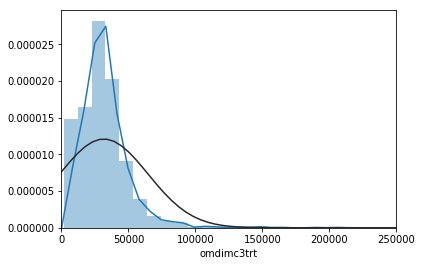

In [7]:
sns.distplot(data_without_nan['omdimc3trt'], bins=100, fit=norm)
plt.xlim(0, 250000)
# , data_without_nan['omdimc3rt'].astype('int32'), hue=data_without_nan['omdimc3'])

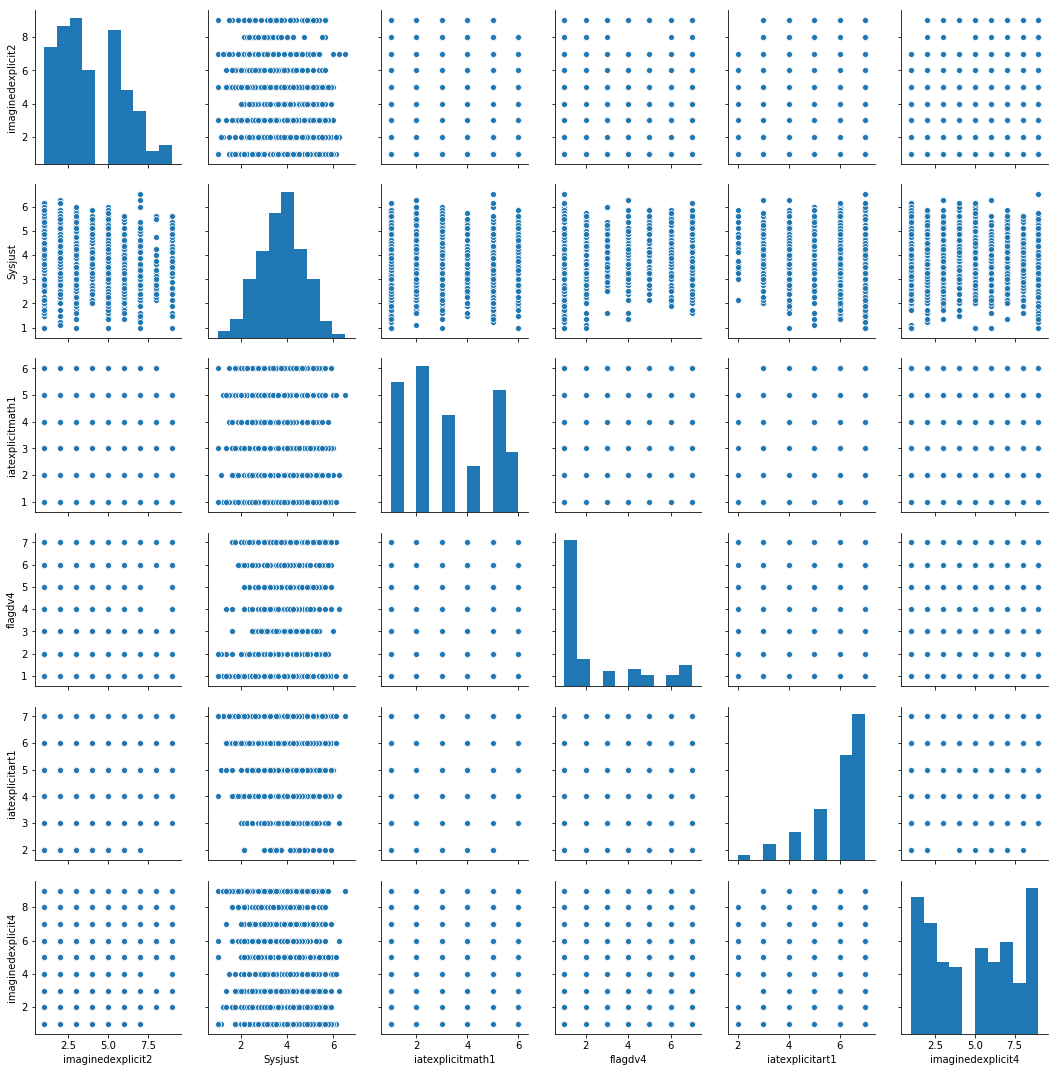

In [8]:
sns.pairplot(data_without_nan.iloc[:,10:20])

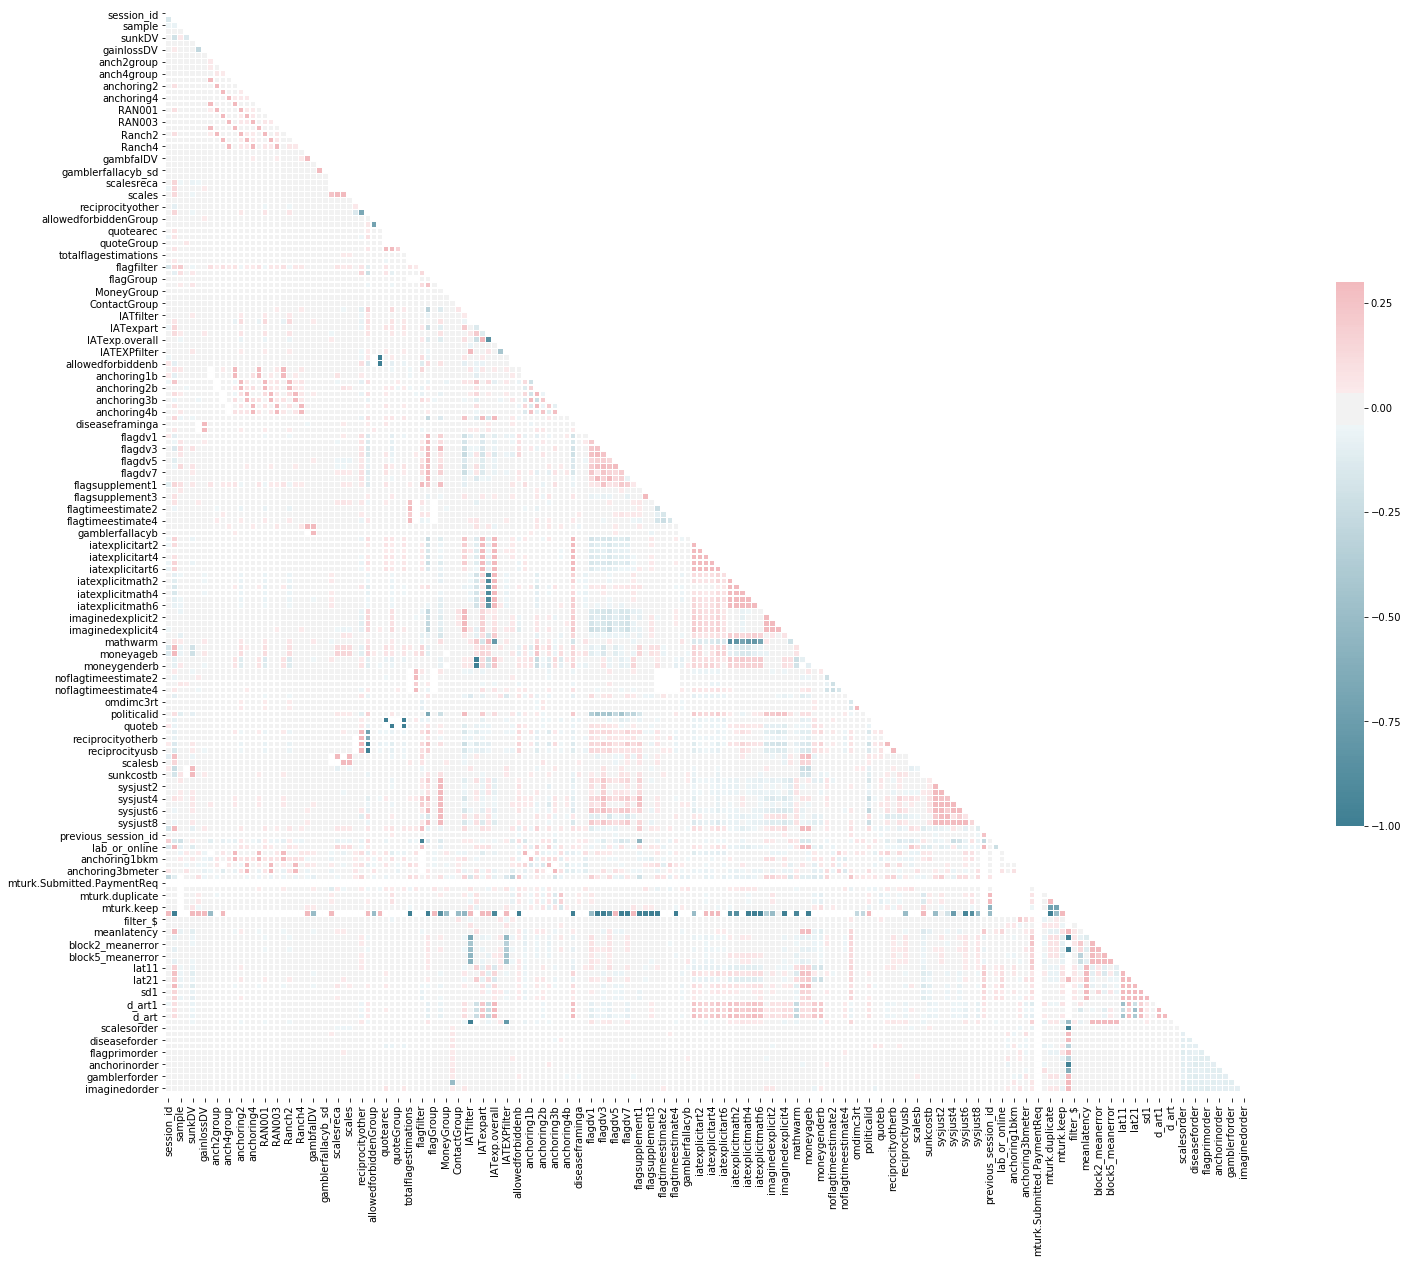

In [13]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('correlation.jpg')

BASELINE MODEL:
We will take the non-empty columns as independent features, and check if those columns can predict the missing values in other columns

### KNN Implementation

In [ ]:
class KNN():
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.data_num = X
        self.data_categ = X
        self.targets = y
    
    def eucliean_distance(self):
        
    def hamming_distance(self):
        
    